## Portfolio Exercise: Starbucks
<br>

<img src="https://opj.ca/wp-content/uploads/2018/02/New-Starbucks-Logo-1200x969.jpg" width="200" height="200">
<br>
<br>
 
#### Background Information

The dataset you will be provided in this portfolio exercise was originally used as a take-home assignment provided by Starbucks for their job candidates. The data for this exercise consists of about 120,000 data points split in a 2:1 ratio among training and test files. In the experiment simulated by the data, an advertising promotion was tested to see if it would bring more customers to purchase a specific product priced at $10. Since it costs the company 0.15 to send out each promotion, it would be best to limit that promotion only to those that are most receptive to the promotion. Each data point includes one column indicating whether or not an individual was sent a promotion for the product, and one column indicating whether or not that individual eventually purchased that product. Each individual also has seven additional features associated with them, which are provided abstractly as V1-V7.

#### Optimization Strategy

Your task is to use the training data to understand what patterns in V1-V7 to indicate that a promotion should be provided to a user. Specifically, your goal is to maximize the following metrics:

* **Incremental Response Rate (IRR)** 

IRR depicts how many more customers purchased the product with the promotion, as compared to if they didn't receive the promotion. Mathematically, it's the ratio of the number of purchasers in the promotion group to the total number of customers in the purchasers group (_treatment_) minus the ratio of the number of purchasers in the non-promotional group to the total number of customers in the non-promotional group (_control_).

$$ IRR = \frac{purch_{treat}}{cust_{treat}} - \frac{purch_{ctrl}}{cust_{ctrl}} $$


* **Net Incremental Revenue (NIR)**

NIR depicts how much is made (or lost) by sending out the promotion. Mathematically, this is 10 times the total number of purchasers that received the promotion minus 0.15 times the number of promotions sent out, minus 10 times the number of purchasers who were not given the promotion.

$$ NIR = (10\cdot purch_{treat} - 0.15 \cdot cust_{treat}) - 10 \cdot purch_{ctrl}$$

For a full description of what Starbucks provides to candidates see the [instructions available here](https://drive.google.com/open?id=18klca9Sef1Rs6q8DW4l7o349r8B70qXM).

Below you can find the training data provided.  Explore the data and different optimization strategies.

#### How To Test Your Strategy?

When you feel like you have an optimization strategy, complete the `promotion_strategy` function to pass to the `test_results` function.  
From past data, we know there are four possible outomes:

Table of actual promotion vs. predicted promotion customers:  

<table>
<tr><th></th><th colspan = '2'>Actual</th></tr>
<tr><th>Predicted</th><th>Yes</th><th>No</th></tr>
<tr><th>Yes</th><td>I</td><td>II</td></tr>
<tr><th>No</th><td>III</td><td>IV</td></tr>
</table>

The metrics are only being compared for the individuals we predict should obtain the promotion – that is, quadrants I and II.  Since the first set of individuals that receive the promotion (in the training set) receive it randomly, we can expect that quadrants I and II will have approximately equivalent participants.  

Comparing quadrant I to II then gives an idea of how well your promotion strategy will work in the future. 

Get started by reading in the data below.  See how each variable or combination of variables along with a promotion influences the chance of purchasing.  When you feel like you have a strategy for who should receive a promotion, test your strategy against the test dataset used in the final `test_results` function.

In [3]:
# load in packages
from itertools import combinations

from test_results import test_results, score
import numpy as np
import pandas as pd
import scipy as sp
import sklearn as sk

import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

# load in the data
train_data = pd.read_csv('./training.csv')
train_data.head()

,ID,Promotion,purchase,V1,V2,V3,V4,V5,V6,V7
0,1,No,0,2,30.443518,-1.165083,1,1,3,2
1,3,No,0,3,32.159350,-0.645617,2,3,2,2
2,4,No,0,2,30.431659,0.133583,1,1,4,2
3,5,No,0,0,26.588914,-0.212728,2,1,4,2
4,8,Yes,0,3,28.044332,-0.385883,1,1,2,2


In [4]:
train_data['pro'] = train_data.Promotion.apply(lambda x: 1 if x == 'Yes' else 0)
train_data.drop(['Promotion', 'ID'], axis = 1, inplace = True)
train_data.head()

,purchase,V1,V2,V3,V4,V5,V6,V7,pro
0,0,2,30.443518,-1.165083,1,1,3,2,0
1,0,3,32.159350,-0.645617,2,3,2,2,0
2,0,2,30.431659,0.133583,1,1,4,2,0
3,0,0,26.588914,-0.212728,2,1,4,2,0
4,0,3,28.044332,-0.385883,1,1,2,2,1


In [5]:
df = train_data.copy()

In [6]:
df.groupby('pro').purchase.mean()

pro
0    0.007565
1    0.017019
Name: purchase, dtype: float64

In [18]:
#hypothesis testing

gr0 = df[df.pro == 0].purchase
gr1 = df[df.pro == 1].purchase

actual_diff = gr1.mean() - gr0.mean()

# H0 : mu1 = mu2

gr0 = gr0 - gr0.mean() + df.purchase.mean()  # now mu's are equal to each other
gr1 = gr1 - gr1.mean() + df.purchase.mean()

diffs = []
for i in range(5000):
    
    gr0_sampled = np.random.choice(gr0, gr0.shape[0], replace = True)
    gr1_sampled = np.random.choice(gr1, gr1.shape[0], replace = True)
    
    mu0 = np.mean(gr0_sampled)
    mu1 = np.mean(gr1_sampled)
    mu_diff = mu1 - mu0
    diffs.append(mu_diff)

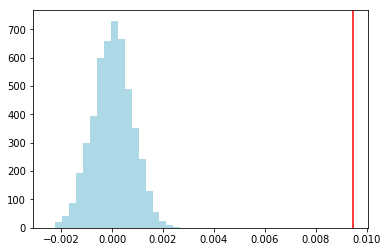

In [19]:
plt.hist(diffs, bins = 20, color = 'lightblue');
plt.axvline(actual_diff, color = 'red');
# so wee see that p-value is so small such that 10k sample size is not enough to see even a single sample with actual_diff value
# we reject the null hypothesis, purchase rate in the sample with promotion code is larger than the value in control group.

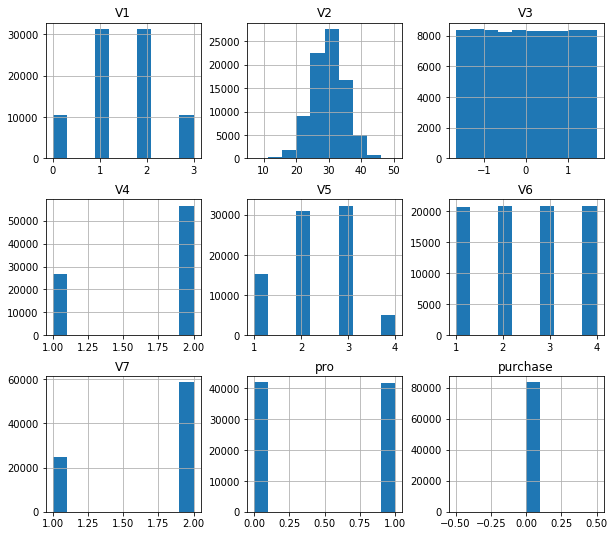

In [5]:
df[df.purchase == 0].hist(figsize = (10, 9));

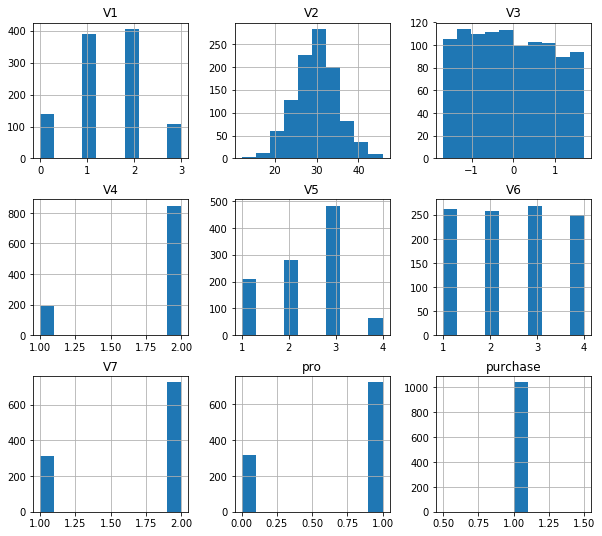

In [6]:
df[df.purchase == 1].hist(figsize = (10, 9));

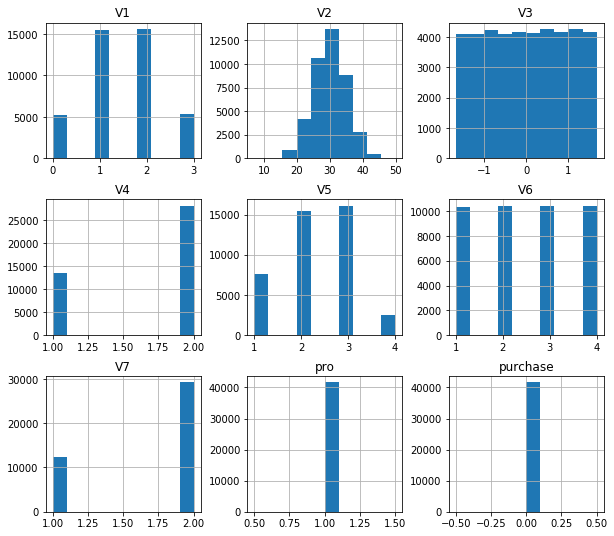

In [7]:
df[(df.pro == 1) & (df.purchase == 0)].hist(figsize = (10, 9));

In [8]:
df.groupby(['pro', 'purchase']).size()

pro  purchase
0    0           41851
     1             319
1    0           41643
     1             721
dtype: int64

In [20]:
# import necessary modules
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import roc_auc_score, make_scorer, accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.svm import SVC
! pip install imbalanced-learn
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.over_sampling import SMOTE
#from imblearn.under_sampling import NearMiss ------------------ sorun var cannot import PyPy
#from imblearn.under_sampling import RandomUnderSampler
from imblearn.metrics import classification_report_imbalanced

import random
SEED = random.seed(42)

    100% |████████████████████████████████| 174kB 2.0MB/s ta 0:00:01
    100% |████████████████████████████████| 5.4MB 85kB/s  eta 0:00:01    38% |████████████▌                   | 2.1MB 33.5MB/s eta 0:00:01
  Found existing installation: scikit-learn 0.19.1
    Uninstalling scikit-learn-0.19.1:
      Successfully uninstalled scikit-learn-0.19.1
You are using pip version 9.0.1, however version 19.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [97]:
data = df[df.pro == 1]

X = data.drop(['pro', 'purchase'], axis = 1)
y = data['purchase']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state = SEED)

In [131]:
def downsample(X_train, y_train):
    idx1 = y_train[y_train == 1].index.tolist()
    idx0 = y_train[y_train == 0].index.tolist()
    
    size = len(idx1)
    idx0_down = np.random.choice(idx0, size, replace = False)
    idx = np.concatenate([idx1, idx0_down], axis = 0)
    np.random.shuffle(idx)
    
    X_train = X_train.loc[idx, :]
    y_train = y_train.loc[idx]
    
    return X_train, y_train

def oversample(X_train, y_train):
    idx0 = y_train[y_train == 0].index.tolist()
    idx1 = y_train[y_train == 1].index.tolist()
        
    size = len(idx0)
        
    idx1_over = np.random.choice(idx1, size, replace = True)
    idx = np.concatenate([idx0, idx1_over], axis = 0)
    np.random.shuffle(idx)
        
    X_train = X_train.loc[idx, :]
    y_train = y_train.loc[idx]
    
    return X_train, y_train

def do_smote(X_train, y_train):
    x_cols = X_train.columns
    X_train, y_train = SMOTE(random_state = SEED).fit_sample(X_train, y_train)
    X_train = pd.DataFrame(X_train, columns = x_cols)
    return X_train, y_train

In [100]:
def print_results(y_test, predict_proba, thresh = 0.45):
    
    pred = (predict_proba > thresh).astype('int')
    acc = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, predict_proba)
    fscore = f1_score(y_test, pred)
    
    print(classification_report(y_test, pred))
    print('\n')
    print(confusion_matrix(y_test, pred))

def downsample(X_train, y_train, X_test, y_test, model, thresh = 0.5):
        
    model_name = model.__class__.__name__
    # downsample
    idx1 = y_train[y_train == 1].index.tolist()
    idx0 = y_train[y_train == 0].index.tolist()
    
    size = len(idx1)
    idx0_down = np.random.choice(idx0, size, replace = False)
    idx = np.concatenate([idx1, idx0_down], axis = 0)
    np.random.shuffle(idx)
    
    X_train = X_train.loc[idx, :]
    y_train = y_train.loc[idx]
        
        
    model.fit(X_train, y_train)
    predict_proba = model.predict_proba(X_test)[:, 1]
        
    print("Metrics for {} ...".format(model_name))
    print_results(y_test, predict_proba, thresh)
        
        
def oversample(X_train, y_train, X_test, y_test, model, thresh = 0.5):
        
    model_name = model.__class__.__name__
    # oversample
    idx0 = y_train[y_train == 0].index.tolist()
    idx1 = y_train[y_train == 1].index.tolist()
        
    size = len(idx0)
        
    idx1_over = np.random.choice(idx1, size, replace = True)
    idx = np.concatenate([idx0, idx1_over], axis = 0)
    np.random.shuffle(idx)
        
    X_train = X_train.loc[idx, :]
    y_train = y_train.loc[idx]
        
    model.fit(X_train, y_train)
    predict_proba = model.predict_proba(X_test)[:, 1]
        
    print("Results for {} ...".format(model_name))
    print_results(y_test, predict_proba, thresh)
        
def doo_smote(X_train, y_train, X_test, y_test, model, thresh = 0.5):
        
    model_name = model.__class__.__name__
    #X_train, y_train = SMOTE(random_state = SEED).fit_sample(X_train, y_train)
    #model.fit(X_train, y_train)
    #predict_proba = model.predict_proba(X_test)[:, 1]
    
    #another try
    pipeline = make_pipeline_imb(SMOTE(random_state = SEED, ratio = .2), model)
    pipeline.fit(X_train, y_train)
    predict_proba = pipeline.predict_proba(X_test)[:, 1]
        
    print("Results for {}...".format(model_name))
    print_results(y_test, predict_proba, thresh)
    
def run_model(X_train, y_train, model, thresh = 0.5):
    
    model.fit(X_train, y_train)
    predict_proba = model.predict_proba(X_test)[:, 1]
    print_results(y_test, predict_proba, thresh)
    
def do_sampling(X_train, y_train, thresh = 0.5):
    
    funcs = [downsample, oversample, do_smote]
    
    for func in funcs:

        X_train, y_train = func(X_train, y_train)
        run_model(X_train, y_train, model, )
    
    print("Over sampling results--------------")
    X_train, y_train = oversample(X_train, y_train)
    
    print("SMOTE results--------------")
    doo_smote(X_train, y_train, X_test, y_test, model)
    
   

In [101]:
model = RandomForestClassifier(n_estimators = 300, class_weight ={0:1, 1:100}, random_state = SEED, max_features = 7)
sampling_solution(model)

Down sampling results--------------
Metrics for RandomForestClassifier ...
             precision    recall  f1-score   support

          0       0.99      0.64      0.77      8323
          1       0.03      0.60      0.06       150

avg / total       0.97      0.64      0.76      8473



[[5299 3024]
 [  60   90]]
Over sampling results--------------
Results for RandomForestClassifier ...
             precision    recall  f1-score   support

          0       0.98      0.99      0.99      8323
          1       0.07      0.02      0.03       150

avg / total       0.97      0.98      0.97      8473



[[8280   43]
 [ 147    3]]
SMOTE results--------------
Results for RandomForestClassifier...
             precision    recall  f1-score   support

          0       0.98      0.99      0.99      8323
          1       0.02      0.01      0.01       150

avg / total       0.97      0.98      0.97      8473



[[8275   48]
 [ 149    1]]


In [41]:
! pip install xgboost

    100% |████████████████████████████████| 16.6MB 27kB/s  eta 0:00:01   41% |█████████████▎                  | 6.9MB 27.2MB/s eta 0:00:01    51% |████████████████▍               | 8.5MB 34.7MB/s eta 0:00:01    70% |██████████████████████▌         | 11.7MB 30.3MB/s eta 0:00:01    98% |███████████████████████████████▋| 16.4MB 34.5MB/s eta 0:00:01
You are using pip version 9.0.1, however version 19.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [160]:
# XGBoost

import xgboost as xgb

def do_xgboost(X_train, y_train, thresh= 0.5, verbose = 0):
    weight = np.zeros(len(y_train))

    samples_ratio = sum(y_train == 0) / sum(y_train == 1)

    weight[y_train == 0] = 1 / samples_ratio
    weight[y_train == 1] = 1  

    dtrain = xgb.DMatrix(X_train, label = y_train, weight = weight)
    dtest= xgb.DMatrix(X_test)

    parameters = {'objective':'binary:logistic',
                 'learning_rate': 0.01, 
                 'max_depth': 3, 
                 'n_estimators': 100,
                  'silent' : 1,
                 #'scale_pos_weight' : samples_ratio
                 }



    xgb_estimator = xgb.train(parameters, dtrain, 10)
    xgb_pred = xgb_estimator.predict(dtest)
    pred = (xgb_pred >= thresh).astype('int')

    acc = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    roc = roc_auc_score(y_test, pred)
    
    if verbose:
              
        print('accuracy : {}   precision : {}    recall : {}  roc: {}'.format(acc, precision, recall, roc))
        print(confusion_matrix(y_test, pred))
    
    return xgb_estimator

In [155]:
import matplotlib.pyplot as plt

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  


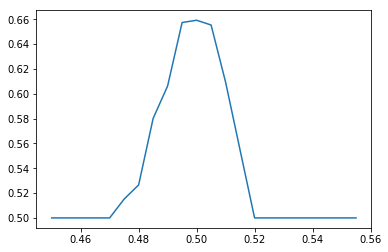

In [144]:
roc_values = []
thresh_range = np.arange(0.45, .55 + 0.005, 0.005)
for thresh in thresh_range:
    acc, pre, rec, roc = do_xgboost(X_train, y_train, thresh)
    roc_values.append(roc)
    
plt.plot(thresh_range, np.array(roc_values));

In [161]:
xgb_estimator = do_xgboost(X_train, y_train, thresh = 0.5, verbose = 1)

accuracy : 0.5767160796903031   precision : 0.02931524830452855    recall : 0.7444444444444445  roc: 0.6591303002166513
[[5974 4437]
 [  46  134]]


In [146]:
# downsampling with XGBoost
def xgboost_downsample(X_train, y_train, thresh = 0.5):
    
    X_train, y_train = downsample(X_train, y_train)
    do_xgboost(X_train, y_train, thresh, 1)
    
def xgboost_oversample(X_train, y_train, thresh = 0.5):
    
    X_train, y_train = oversample(X_train, y_train)
    do_xgboost(X_train, y_train, thresh, 1)
    
def xgboost_smote(X_train, y_train, thresh = 0.5):

    X_train, y_train = do_smote(X_train, y_train)

    do_xgboost(X_train, y_train, thresh, 1)

In [151]:
xgboost_downsample(X_train, y_train, 0.5)
xgboost_oversample(X_train, y_train, 0.5)
xgboost_smote(X_train, y_train, 0.5)

accuracy : 0.5465017467661222   precision : 0.027203927183473104    recall : 0.7388888888888889  roc: 0.641032188177035
[[5655 4756]
 [  47  133]]
accuracy : 0.5790765744500047   precision : 0.029269366197183098    recall : 0.7388888888888889  roc: 0.6576012017204026
[[6000 4411]
 [  47  133]]
accuracy : 0.6924747427060712   precision : 0.027922675667382633    recall : 0.5055555555555555  roc: 0.6006310099360719
[[7243 3168]
 [  89   91]]


In [121]:
10 * 132  - 0.15 * 4415 - 10 * 55

107.75

In [ ]:
# oversampling with XGBoost

idx0 = y_train[y_train == 0].index.tolist()
idx1 = y_train[y_train == 1].index.tolist()
        
size = len(idx0)
        
idx1_over = np.random.choice(idx1, size, replace = True)
idx = np.concatenate([idx0, idx1_over], axis = 0)
np.random.shuffle(idx)
        
X_train = X_train.loc[idx, :]
y_train = y_train.loc[idx]

do_xgboost(X_train, y_train)

0.1732394366197183

In [13]:
# undersampling

samples1 = y[y == 1].index.tolist()
samples0 = y[y == 0].index.tolist()

size = len(samples1)
samples0_under = np.random.choice(samples0, size, replace = False)

idx_under = np.concatenate([samples1, samples0_under] , axis= 0)
np.random.shuffle(idx_under)
X_under = X.loc[idx_under, :]
y_under = y.loc[idx_under]


In [14]:
# oversampling cok fazla overfittig oluyor. Xdeki butun postive case leri yakalayabiliyorken 
# diger taraftakileri yakalayamiyor.

samples1 = y[y == 1].index.tolist()
samples0 = y[y == 0].index.tolist()
size = len(samples0)
samples1_over = np.random.choice(samples1, size, replace = True)

idx_over = np.concatenate([samples1_over, samples0], axis = 0)
np.random.shuffle(idx_over)

X_over = X.loc[idx_over, : ]
y_over = y.loc[idx_over]


In [15]:
X_otrain, X_otest, y_otrain, y_otest = train_test_split(X_over, y_over, test_size = 0.25, random_state = SEED)

In [16]:
X_utrain, X_utest, y_utrain, y_utest = train_test_split(X_under, y_under, test_size = 0.25, random_state = SEED)

In [68]:
lr = LogisticRegression(n_estimators = 300, random_state= SEED)
scorer = make_scorer(roc_auc_score)
scores = cross_val_score(lr, X_train, y_train, scoring = scorer, cv = 3)

In [169]:
X_test.head()

,V1,V2,V3,V4,V5,V6,V7
49757,1,30.449386,0.133583,2,1,1,2
15465,1,29.512323,0.306739,1,3,2,2
3840,2,41.658694,0.393317,2,2,1,2
18255,2,32.031691,-1.511395,1,3,2,2
56116,2,38.596251,0.653050,1,1,4,2


In [175]:
promotion_strategy(X_test)

array(['Yes', 'No', 'No', ..., 'Yes', 'No', 'No'], 
      dtype='<U3')

In [174]:
def promotion_strategy(df):
    '''
    INPUT 
    df - a dataframe with *only* the columns V1 - V7 (same as train_data)

    OUTPUT
    promotion_df - np.array with the values
                   'Yes' or 'No' related to whether or not an 
                   individual should recieve a promotion 
                   should be the length of df.shape[0]
                
    Ex:
    INPUT: df
    
    V1	V2	  V3	V4	V5	V6	V7
    2	30	-1.1	1	1	3	2
    3	32	-0.6	2	3	2	2
    2	30	0.13	1	1	4	2
    
    OUTPUT: promotion
    
    array(['Yes', 'Yes', 'No'])
    indicating the first two users would recieve the promotion and 
    the last should not.
    '''
    dtest = xgb.DMatrix(df)
    pred_xgb = xgb_estimator.predict(dtest)
    pred = (pred_xgb > 0.5).astype('int')
    pro = np.zeros(df.shape[0])
    pro[pred == 1] = 1
    pro[pred == 0] = 0
    
    promotion = np.where(pro == 1, 'Yes', 'No')
    
    return promotion

In [176]:
# This will test your results, and provide you back some information 
# on how well your promotion_strategy will work in practice

test_results(promotion_strategy)

Nice job!  See how well your strategy worked on our test data below!

Your irr with this strategy is 0.0195.

Your nir with this strategy is 396.45.
We came up with a model with an irr of 0.0188 and an nir of 189.45 on the test set.

 How did you do?


(0.019506350838739649, 396.45000000000005)